# Assignment 1 - Single Perceptron Algorithm
---
Muhammed Ersoy - mue@tamu.edu - [Github Repository](https://github.com/UlascanErsoy/ECEN427-TAMU)

- [Step 1 | Loading the data](#step1)
- [Step 2 | Visualizing the Feature Vectors](#step2)
- [Step 3 | The Single Layer Perceptron Algorithm](#step3)
- [Step 4 | Attempting Non-Linear Classification](#step4)

---

### Step 0 - Environment

In [182]:
from typing import Optional, List
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

<h3 id="step1">Step 1 - Downloading & Loading the Data</h4>

In [183]:
df = pd.read_csv(
            "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
            header=None,
            encoding="utf-8"
        )
df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length','Petal Width','Class']

df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<h3 id="step2">Step 2 - Visualizing the Feature Vectors</h3>

<Axes: xlabel='Sepal Length', ylabel='Petal Length'>

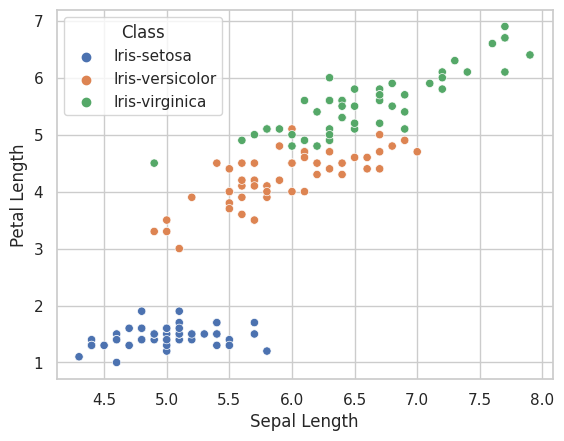

In [184]:
seaborn.set(style='whitegrid')
seaborn.scatterplot(x='Sepal Length',
                    y='Petal Length',
                    hue='Class',
                    data=df)

`Iris-setosa` and `Iris-versicolor` **are** linearly seperable while `Iris-versicolor` and `Iris-virginica` are <ins>**not**</ins> linearly seperable.

`Iris-setosa` and `Iris-virginica` **are** also linearly seperable.

<h3 id="step3">Step 3 - The Single Layer Perceptron Algorithm</h3>

In [189]:
class SingleLayerPerceptron:

    def __init__(self, weights: Optional[np.ndarray] = None,
                       n: int = 1000,
                       alpha: float = 0.01):
        """Initialize a Single Layer Perceptron
        :param n: number of training iterations
        :type n: int
        :param alpha: the learning rate
        :type alpha: float , 0 < a < 1
        """ 
        self.weights: Optional[np.ndarray] = weights
        self.n: int = n
        self.alpha: float = alpha
        self.updates: List[int] = []

    def train(self, 
                X: np.ndarray, 
                y: np.ndarray,
                seed: Optional[int] = None
              ):
        """Train the weights for the perceptron algorithm 
            :param X: ndarray of feature vectors, bias element will
            be added automatically
            :type X: ndarray
            :param y: ndarray of result vector
            :type y: ndarray
            :param seed: seed for random number generator
            :type seed: None or int
        """
        X = np.insert(X, 0, 1, axis=1) # bias element

        if not self.weights:
            rng = np.random.RandomState(seed=seed)
            self.weights = rng.normal(
                loc=0.0,
                scale=0.01,
                size=X.shape[1]
            )

        for _ in range(self.n):
            self.updates.append(0)
            for xi, yi in zip(X,y):
                update = self.alpha * (yi - self._predict(xi))
                self.weights += update * xi

                if update > 0:
                    self.updates[-1] += 1

    def _predict(self, xi: np.ndarray) -> int:
        """Generate a prediction based on the weights
            :param xi: ndarray of feature vectors, bias element will
            be added automatically
            :type xi: ndarray
            :returns: prediction
            :rtype: int
        """
        return 1 if np.dot(xi, self.weights) >= 0 else 0
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """Make predictions for the input dataset
        """
        X = np.insert(X, 0, 1, axis=1)
        
        return np.array([
            self._predict(xi) for xi in X
        ])

    def draw_decision_boundary(self,
                                X: np.ndarray,
                                r: float = 0.02):
        """Draw the decision boundary
        requires matplotlib
        :param X: feature vector
        :type X: np.ndarray
        :param r: resolution of the grid
        :type r: float
        """
        x1_min , x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min , x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        xx1, xx2 = np.meshgrid(
            np.arange(x1_min, x1_max, r),
            np.arange(x2_min, x2_max, r)
        )

        pred = self.predict(
            np.array([xx1.ravel(), xx2.ravel()]).T
        )
        pred = pred.reshape(xx1.shape)
        
        colors = ('blue','red')
        cmap = ListedColormap(colors)
        plt.contourf(xx1, xx2, pred, alpha=0.3, cmap=cmap)

        
        


Filter the data to only have two linearly seperable classes, and replace class names with `0` or `1` to be used as the target
parameter in the model.

100.00% Success Rate


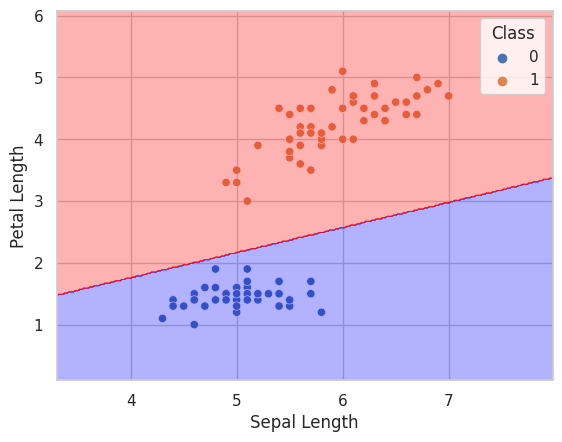

In [213]:

clean_df = df[df['Class'].isin(['Iris-setosa','Iris-versicolor'])].sample(frac = 1)
clean_df['Class'] = clean_df['Class'].apply(lambda x: 0 if x == 'Iris-setosa' else 1)

train_df = clean_df.head(75)

#use the model
features = ['Sepal Length','Petal Length']

model = SingleLayerPerceptron()
y = train_df[['Class']].to_numpy()
X = train_df[features].to_numpy()
model.train(
    X,
    y
)

test_df = clean_df.tail(25)

predict = model.predict(test_df[features].to_numpy())

splt = seaborn.scatterplot(x='Sepal Length',
                    y='Petal Length',
                    hue='Class',
                    data=clean_df)

model.draw_decision_boundary(X)

errs = [1 for pred, yi in zip(predict, test_df[['Class']].to_numpy()) if pred == yi[0]]
print(f"{len(errs)/len(test_df.index) * 100:.2f}% Success Rate")